# Assignment 5                                                                   Ajay Kumar Gautam

# Question 1

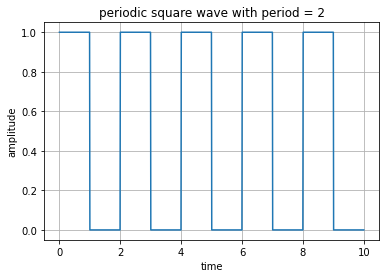

In [72]:
import numpy as np
import matplotlib.pyplot as plt
'''periodic square wave with period =2'''
t = np.linspace(0,10,1000)
s_w = []
for x  in t:
    if (x>=0 and x<=1) or (x>=2 and x<=3) or (x>=4 and x<=5)or (x>=6 and x<=7)or (x>=8 and x<=9) :
        s_w.append(1)
    else:
        s_w.append(0)
plt.plot(t,s_w)
plt.title('periodic square wave with period = 2')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.show()


 NOTE:This signal have odd half wave symmetry so only A0 and Bn coefficient will be present

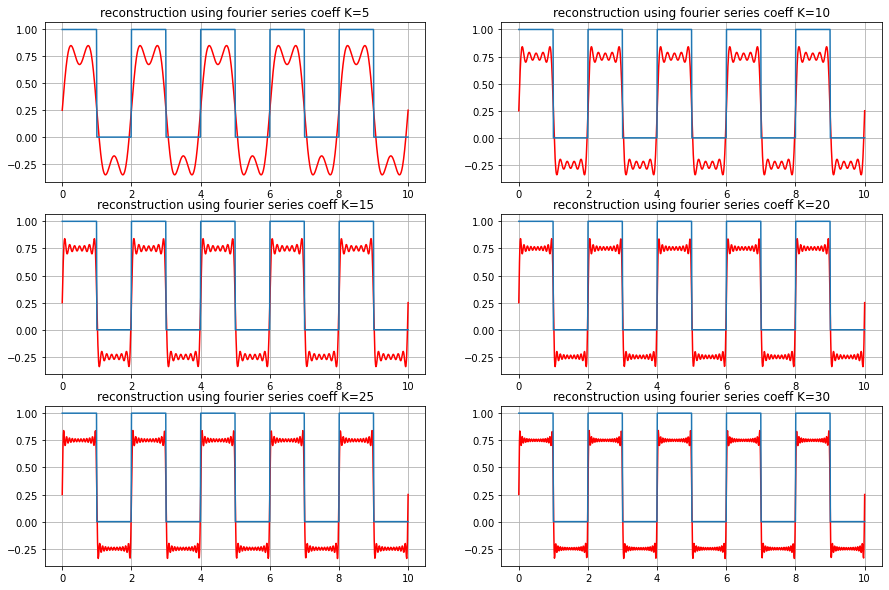

In [71]:
from scipy.integrate import simps
def fs_coeff(n,T):
    total =[]
    a0 =0.5
    for k in range(1,n):
        Bk = 2/10*simps(s_w*np.sin(2*np.pi*k*t/T),t)
        total.append(Bk*np.sin(2*np.pi*k*t/T))
    return (a0/2+sum(total))
K = [5,10,15,20,25,30]
j=1
fig,axs = plt.subplots(3,2,figsize=(15,10))
for i in K:
    plt.subplot(3,2,j)
    a = fs_coeff(i,2)
    plt.plot(t,a,color='red')
    plt.plot(t,s_w)
    plt.grid()
    plt.title('reconstruction using fourier series coeff K='+str(i))
    j = j+1


 Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum.
that is if number os harmonics increses the overshoot does not die out rapidly it takes more time to die out

# Question 2

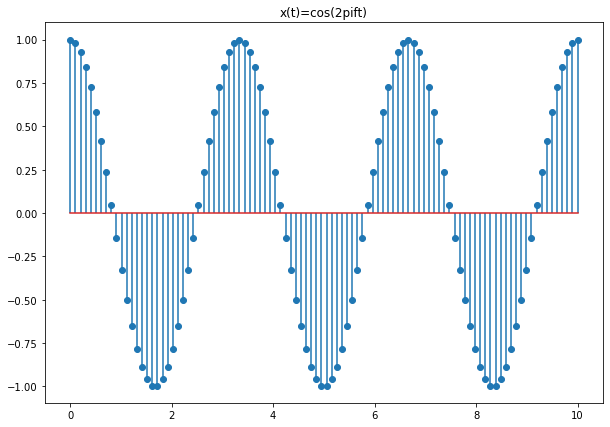

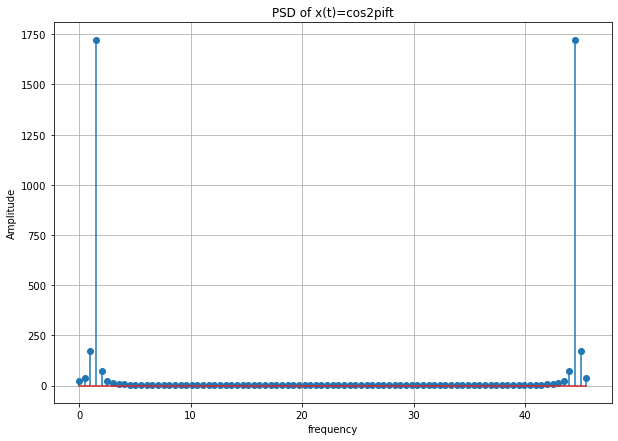

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import cmath
# function to implement DFT
def DFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for k in range(N):
        for n in range(N):
            theta = 2j*np.pi*n*k/N
            array1[k] = array1[k]+array[n]*cmath.exp(-theta)
    
    return array1
A =1
f0=30
fs = 100 
T=0.91
N=91
t =np.linspace(0,10,100)
# X(t)=cos(2pift)
x = A*np.cos(2*np.pi*f0*t)
fig = plt.figure(figsize=(10,7))
plt.stem(t,x,use_line_collection=True)
plt.title("x(t)=cos(2pift)")
#computing DFT of x(t) and PSD of X(t)
y = DFT(x,N) 
y1 = np.abs(y)
ps = np.square(y1)
f1 = np.linspace(0,N/2,len(ps))
#plotting the PSD of X(t)
fig = plt.figure(figsize=(10,7))
plt.stem(f1,ps,use_line_collection=True)
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.title('PSD of x(t)=cos2pift')
plt.grid()
plt.show()
# Visualizing Spectral leakage


# Question 3

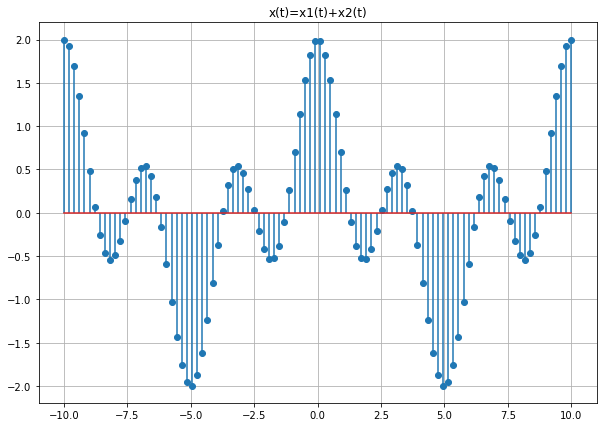

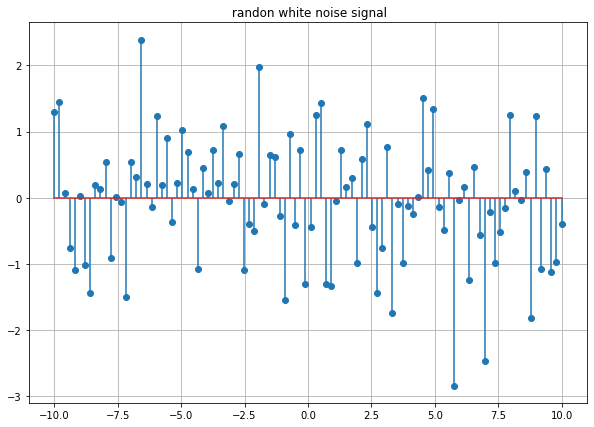

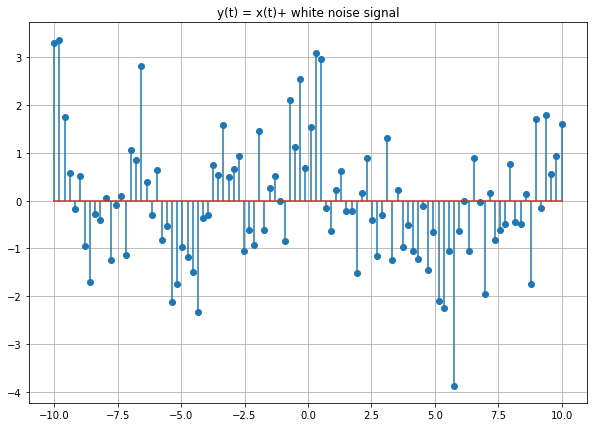

DFT of y(t): [ 6.00602591+0.00000000e+00j  6.88687007-6.77282411e+00j
  4.0628624 -2.70583481e+00j -0.5905343 -1.81138913e+00j
  2.42842855-1.99746060e+00j  1.30056816+3.51370746e-16j
  2.42842855+1.99746060e+00j -0.5905343 +1.81138913e+00j
  4.0628624 +2.70583481e+00j  6.88687007+6.77282411e+00j]


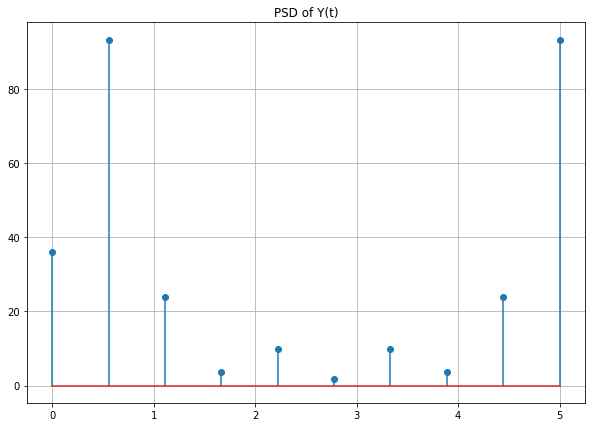

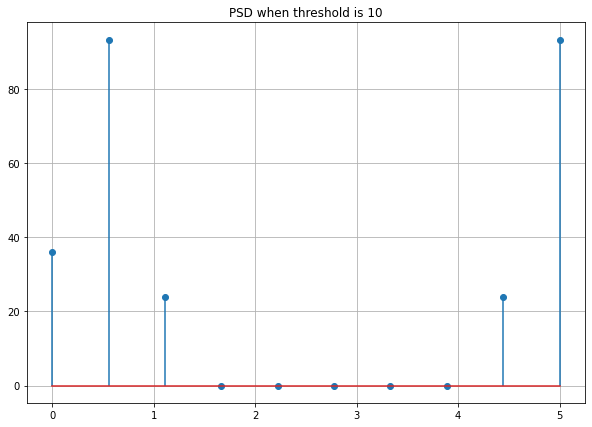

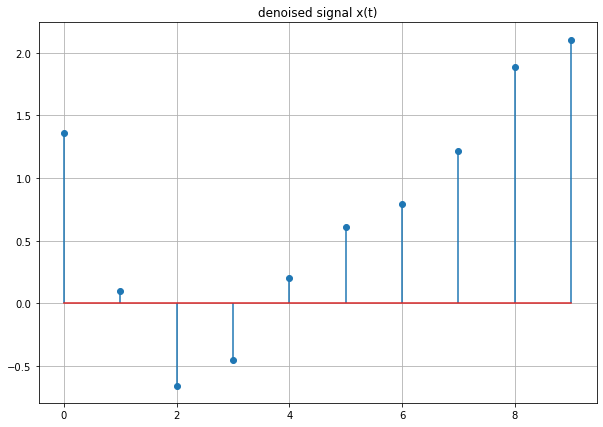

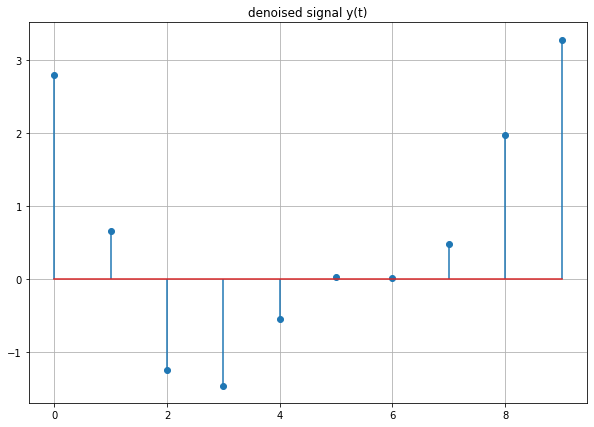

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
t = np.linspace(-10,10,100)
x = np.cos(2*np.pi*10*t)+np.cos(2*np.pi*30*t)   #x(t)= cos(2pif1t)+cos(2pif2t)
fig = plt.figure(figsize=(10,7))
plt.stem(t,x,use_line_collection=True)
plt.title('x(t)=x1(t)+x2(t)')
plt.grid()
plt.show()
random.seed(1)
wn = [random.gauss(0.0,1.0) for i in range(100) ]  # white noise signal with zero mean and unit variance
fig = plt.figure(figsize=(10,7))
plt.stem(t,wn,use_line_collection=True)
plt.grid()
plt.title(' randon white noise signal')
plt.show()
y =x+wn           # y(t)= X(t)+ white noise signal
fig = plt.figure(figsize=(10,7))
plt.stem(t,y,use_line_collection=True)
plt.grid()
plt.title("y(t) = x(t)+ white noise signal")
plt.show()
N = 10   # period of x(t)
y_w = DFT(y,10)
print("DFT of y(t):",y_w)
# for PSD of Y(t) and plotting of PSD of Y(t)
y1 = np.abs(y_w)
ps = np.square(y1)     
f1 = np.linspace(0,N/2,len(ps))
fig = plt.figure(figsize=(10,7))
plt.stem(f1,ps,use_line_collection=True)
plt.grid()
plt.title('PSD of Y(t)')
plt.show()
# denoising the sequence by taking threshold value 10(let)
indices  = ps>10
psdclean = ps*indices
fig = plt.figure(figsize=(10,7))
plt.stem(f1,psdclean,use_line_collection=True)
plt.grid()
plt.title('PSD when threshold is 10')
plt.show()
y_w = indices*y_w
def IDFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for n in range(N):
        for k in range(N):
            theta = 2j*np.pi*n*k/N
            array1[n] = array1[n]+array[k]*cmath.exp(-theta)
    array1=array1/N
    return array1
yt = IDFT(y_w,N)    #computing the IDFT of Y(t)
x_w =DFT(x,N)     # Computing the DFT of X(t)
x_w = indices*x_w  # taking threshold value 10(let)
xt = IDFT(x_w,N)   #computing the IDFT to get x(t)
t1 = np.arange(0,10)
fig = plt.figure(figsize=(10,7))
plt.stem(t1,xt,use_line_collection=True) # plotting x(t) using threshold value 10(let)
plt.grid()
plt.title('denoised signal x(t)')
plt.show()
fig = plt.figure(figsize=(10,7))
plt.stem(t1,yt,use_line_collection=True) # plotting y(t) using threshold value 10(let)
plt.grid()
plt.title('denoised signal y(t)')
plt.show()


